# 1. M/M/C/C

#### 1.1. simulation program for a wireless cell that is modeled by an M/M/C/C queueing system.

I initially created a simulation of M/M/C where I took inspiration from the M/M/1 (single-server queueing system) simulation model where the capacity of the queue is infinite, the number of servers is C, the probability distribution of inter-arrival times and the probability distribution of service times (job sizes) is M. I then used the M/M/C to create the M/M/C/C simulation where the capacity of the queue is set to C. The following is a summary of important function to create the graph for blocking probability and server utilization per arrival rate of M/M/C/C: 
<ul>
    <li>In the main function I call all the relevant functions as mentioned below to successfully run a simulation of M/M/C/C. I have to initialise all global variables that will be used in this simulation in the main function.</li>
    <li>I have the arrival function that schedules the next arrival in the system where it finds an idle serve (if all the servers are not busy) and schedule the departure time for this event in the time_next_event list. The first index of the time_next_event list is dedicated to new arrival and the rest is used for departure time. </li>
    <li>The depart function replace the element (call that has ended) in the list to 0 (this means the server is now idle) except the first item because it holds the arrival time for new calls. </li>
    <li>Over time after simulation with idealy 10,000 to 2000,000 calls (or customers) the patterns for the blocking probability  and the server utilization can be calculated in the report function using the formula in the coursework sheet exercise 2. The analytical model is used to verify the aggregated blocking probability for the simulation.</li>
    <li> The analytical function is used to verify the simulation results over time per calls.</li>

</ul>

Finally, when the main function has run all the events and relevant functions it returns the server utilization, blocking probability, analytical server utilization, and analytical blocking probability. These values are used to create the graphs need in exercise 1.2.


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
# plt.style.use('seaborn-whitegrid')
import numpy as np
import random
import math

# SYSTEM STATE VARIABLE
c = 16
mean_service = 100
num_customer_required = 100000    # used to end simulation



def main(ar):
    global time_past,time_arrival,total_loss,sim_time,next_event_type,time_next_event,area_server_status,server_status,mean_interarrival,num_customer_required,num_customers,time_last_event,max_double,num_events
    
    next_event_type = 0
    
    time_next_event= [0]*(c+1)
    
    server_status = [0]*c         # server status is IDLE.
    
    sim_time = 0.0
    
    total_loss = 0

    
    # Initialize the state variables
    num_customers = 0
    
    time_last_event = 0.0
    
    max_double = float("inf")
    
    num_events = c+1

    # Initialize the statistical counters
    area_server_status = [0]*c
    
    mean_interarrival = 1/ar
    
    # Initialize event list
    
    for i in range(0,c):
        server_status [i] = 0

    for i in range(0,c):
        area_server_status [i] = 0
    
    time_next_event [0] = sim_time + expon(mean_interarrival)   # determine next arrival

    for i in range(1,c+1):
        time_next_event [i] = max_double  # determine next departure


    while num_customers < num_customer_required:

        timing() # Determine the next event

        update_time_avg_stats() # NEXT STEP

        if next_event_type == 0:
            arrive() # next event is arrival

        else:
            depart(next_event_type) # next event is departure


    return report()




def timing():
    global sim_time,time_last_event,next_event_type

    min_time_next_event = max_double-1
   
    # Determine the event type of the next event to occur
    
    for i in range(num_events):
        if ( time_next_event[i] <= min_time_next_event ):
            min_time_next_event = time_next_event[i]
            
            next_event_type = i

    time_last_event = sim_time
    
    # advance the simulation clock
    
    sim_time = time_next_event[next_event_type]



def update_time_avg_stats():
    global time_past,area_server_status
    
    # Update area accumulators for time-average statistics
    
    time_past = sim_time-time_last_event

    for i in range(0,c):
        area_server_status[i] += time_past * server_status[i]



def arrive():
    global server_status,time_arrival,time_next_event,num_customers,total_loss
    # Schedule next arrival
    
    time_next_event[0] = sim_time + expon(mean_interarrival)
    
    try:
        server_idle = server_status.index(0)

        server_status[server_idle] = 1
        
        time_next_event[server_idle+1] = sim_time + expon(mean_service)
        
        num_customers+= 1
        
    except:  # server is BUSY
        total_loss+= 1
        



def depart(j):
    global server_status,time_next_event,num_in_q,total_loss,time_arrival
    
    server_status[j-1] = 0
    
    time_next_event[j] = max_double





def report():
    # Compute the desired measures of performance
    server_utilization=0
    
    for i in range(0,c):
        server_utilization += area_server_status[i]
        
    server_utilization = server_utilization/sim_time/c
    
    blocking_probability = total_loss/num_customers
    model1,model2 = analytical()
    return server_utilization,model2,model1,blocking_probability


def analytical():
    # Compute the analytical measures of performance
    lambda_muie = 1/(mean_interarrival/mean_service)
         
    top = (lambda_muie**c)/math.factorial(c)
    
    bottom = 0
    
    for k in range(0,c):
        bottom+=(lambda_muie**k)/math.factorial(k)
    
    bp = top/bottom
    
    su = ((1-bp)*(lambda_muie))/c
    
    return bp,su


def expon(mean):
    # Return an exponential random variate with mean "mean".
    
    RAND = random.uniform(0,1)
    
    average =  -mean* (math.log(RAND)) # RAND is uniformally distributed on (0, 1)
    
    return average


#### 1.2.  Draw figures to depict the performance results for the Blocking Probability and the Server Utilization 

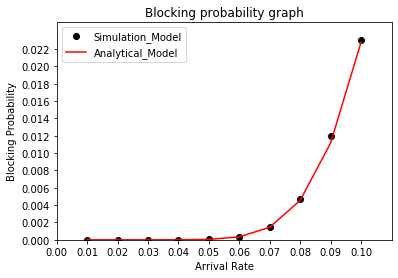

In [3]:
y1 = []

y2 = []

y3 = []

y4 = []

x = np.arange(0.01, 0.11, 0.01)

for f in range(len(x)):
    p = main(x[f])
    
    y1.append(p[3])
    
    y2.append(p[2])
    
    y3.append(p[0])
    
    y4.append(p[1])
    

fig = plt.figure()

plt.xlabel("Arrival Rate")

plt.ylabel("Blocking Probability")

plt.plot(x,y1,'ok',label='Simulation_Model')

plt.plot(x,y2,'-r',label='Analytical_Model')

plt.title('Blocking probability graph')

plt.legend(loc='upper left')

y = np.asarray(y2);
plt.xlim(x.min() * 1.1, x.max() * 1.1);
plt.ylim(y.min() * 1.1, y.max() * 1.1);
plt.xticks(np.arange(0.00, 0.11, 0.01));
plt.yticks(np.arange(0.00, y.max(), 0.002));

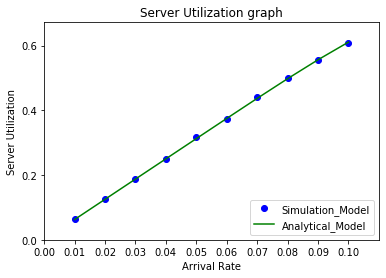

In [4]:
fig= plt.figure()

plt.xlabel("Arrival Rate")

plt.ylabel("Server Utilization")

plt.plot(x,y3,'ob',label='Simulation_Model')

plt.plot(x,y4,'-g',label='Analytical_Model')

plt.title('Server Utilization graph')

plt.legend(loc='lower right')

y = np.asarray(y4);
plt.xlim(x.min() * 1.1, x.max() * 1.1);
plt.ylim(y.min() * 1.1, y.max() * 1.1);
plt.xticks(np.arange(0.00, 0.11, 0.01));
plt.yticks(np.arange(0.00, y.max(), 0.2));

I used Erlang's Loss Formula as the analytical model to verify the simulation model's result for the server utilization, which is: 
$U = NB/n = (1-B)*x/n$, where 
<ul>
    <li>$U$ is the server utilization;</li>
    <li>$NB = (1-B)*x$ is the average number of busy servers;</li>
    <li>$x = λ/μ$ is the traffic intensity measured in erlangs;</li>
    <li>$n$ is the number of servers;</li>
    <li>$λ$ is the arrival rate;</li>
    <li>$μ$ is the service rate;</li>
</ul>
</div>

#### 1.3.  Find the maximum value of Blocking Probability.
### The maximum value for input rates so that the blocking probability < 0.01 is 0.87 ~ 0.88

# 2. M1+M2/M/C/C

#### 2.1 Simulation program for a wireless cell with handover

The M1+M2/M/C/C has a two-priority class arrivals (different source of arrivals), for a single M/M/C/C queue. I took inspiration from the M/M/C/C simulation to create that of M1+M1/M/C/C simulation. I ensured that there were two indexes in the list which contained the next event times(ideally the first two indexes) where the arrival for the new call and the handover call respectively. The following is a summary of important events to create the graph for aggregated blocking probability of M1+M2/M/C/C: 
<ul>
    <li>In the main function I call all the relevant functions as mentioned below to successfully run a simulation of M1+M2/M/C/C. I have to initialise all global variables that will be used in this simulation in the main function.</li>
<li> Timing function advances the simulation clock and determines the event type of the next event to occur </li>
    <li>I have the arrival function that schedules the next arrival in the system where it finds an idle serve (if all the servers are not busy) and schedule the departure time for this event in the time_next_event list. The system checks if the call that enters this cell is a handover call(higher priority) or a new call and drops any call if there is no idle serve or not enough idle server for new calls.</li>
    <li>The depart function replace the element (call that has ended) in the list to 0 (this means the server is now idle)except the first two items because the hold the arrival time for the handover and new calls.</li>
    <li>Over time after simulation with idealy 10,000 to 2,000,000 calls (or customers) the patterns for the aggregated blocking probability can be calculated in the report function using the formula in the coursework sheet exercise 2. The analytical model is used to verify the aggregated blocking probability for the simulation.</li>

</ul>

Eventually, when the main function has run all the events and relevant functions it returns the aggregated blocking probability, and the analytical aggregated blocking probability. These values are used to create the graphs need in exercise 2.2, and 2.3.



In [5]:
# SYSTEM STATE VARIABLE
c = 16
mean_service = 100
num_customer_required = 100000    # used to end simulation




def main(ar,tp):
    global total_new_call_loss,total_handover_loss,total_handover_arrivals,total_new_call_arrivals,lambda_2,time_past,time_arrival,sim_time,next_event_type,time_next_event,area_server_status,server_status,mean_interarrival,num_customer_required,num_customers,time_last_event,max_double,num_events,num_customers

    next_event_type = 0

    time_next_event= [0]*(c+2)

    server_status = [0]*c         # server status is IDLE.

    sim_time = 0.0

    total_new_call_loss = 0

    total_handover_loss = 0
    
    total_new_call_arrivals = 0

    total_handover_arrivals = 0


    # Initialize the state variables
    num_customers = 0

    time_last_event = 0.0

    max_double = float("inf")

    num_events = c+2

    # Initialize the statistical counters
    area_server_status = [0]*c

    mean_interarrival = 1/ar
    
    lambda_2 = 1/tp

    # Initialize event list
    for i in range(0,c):
            server_status [i] = 0

    for i in range(0,c):
            area_server_status [i] = 0

    time_next_event [0] = sim_time + expon(mean_interarrival)   # determine next arrival
    time_next_event [1] = sim_time + expon(lambda_2)   # determine next arrival

    for i in range(2,c+2):
            time_next_event [i] = max_double  # determine next departure


    while num_customers < num_customer_required:

            timing() # Determine the next event

            update_time_avg_stats() # NEXT STEP

            if next_event_type == 0:
                    arrive(0)     # next event is the arrival of a new call

            elif next_event_type == 1:
                    arrive(1)     # next event is the arrival of a handover call

            else:
                    depart(next_event_type) # next event is departure


    return report()

   

    
def timing():
    global sim_time,time_last_event,next_event_type,max_double

    min_time_next_event = max_double-1

    # Determine the event type of the next event to occur

    for i in range(num_events):
            if ( time_next_event[i] <= min_time_next_event ):
                    min_time_next_event = time_next_event[i]

                    next_event_type = i

    time_last_event = sim_time

    # advance the simulation clock

    sim_time = time_next_event[next_event_type]


#PART 3
def update_time_avg_stats():
    global time_last_event,time_past,area_server_status,c

    # Update area accumulators for time-average statistics

    time_past = sim_time-time_last_event

    for i in range(1,c):
            area_server_status[i] += time_past * server_status[i]


            
def arrive(j):
    global server_status,num_in_q,time_arrival,time_next_event,mean_service,total_new_call_loss,total_handover_loss,total_handover_arrivals,total_new_call_arrivals,num_customers
    # Schedule next arrival

    if j==0:
            time_next_event[0] = sim_time + expon(mean_interarrival)
            total_new_call_arrivals += 1
            if server_status.count(0)>2:
                    server_idle = server_status.index(0)
                    server_status[server_idle] = 1
                    time_next_event[server_idle+2] = sim_time + expon(mean_service)
            else:
                    total_new_call_loss +=1   # not enough servers are available to accomodate the new call
    else:
            time_next_event[1] = sim_time + expon(lambda_2)
            total_handover_arrivals+= 1
            if server_status.count(0)> 0:
                    server_idle = server_status.index(0)
                    server_status[server_idle] = 1
                    time_next_event[server_idle+2] = sim_time + expon(mean_service)
            else:
                    total_handover_loss+=1     # all servers are BUSY

    num_customers = total_new_call_arrivals + total_handover_arrivals
    

    
def depart(j):
    global server_status,time_next_event

    server_status[j-2] = 0

    time_next_event[j] = max_double


    
def report():
    # Compute the desired measures of performance
    
    new_calls = total_new_call_loss / total_new_call_arrivals

    handover_calls = total_handover_loss / total_handover_arrivals
 
    aggregated_blocking_probability = new_calls + 10 * handover_calls
    
    model  = analytical()
    
    return  aggregated_blocking_probability,model

 
def analytical():
    # Compute the analytical measures of performance
    n = 2

    lambda1_muie = 1/(mean_interarrival/mean_service)
    
    lambda2_muie = 1/(lambda_2/mean_service)
  
    lambda12_muie = (lambda1_muie+lambda2_muie)

    first = 0
    
    second = 0
    
    prob_loss_1 = 0
    
    for k in range(0,(c-n)+1):
        first += ((1/math.factorial(k)) * (lambda12_muie**(k)))

    for k in range((c-n+1),c+1):
        second += ((1/math.factorial(k))*(lambda12_muie**(c-n))*(lambda2_muie**(k-(c-n))))
 
    P_0 = 1/(first + second)    # The initial state probability
       
    for k in range((c-n),c+1):
        if 0 <= k <= (c-n):
            P_k = (1/math.factorial(k))*(lambda12_muie**(k))*(P_0) # The state probabilities 

        else:
            P_k = (1/math.factorial(k)) * (lambda12_muie**(c-n)) * ((lambda2_muie)**(k-(c-n))) * (P_0)     # The state probabilities 
        
        prob_loss_1 += P_k      # The blocking probability that the new calls    

    
    prob_loss_2 = (1/math.factorial(c))*(lambda12_muie**(c-n))*(lambda2_muie**(n))*(P_0)        # The blocking probability that a handoff call

    abp = prob_loss_1 + 10 * prob_loss_2

    return abp

    

def expon(mean):
    # Return an exponential random variate with mean "mean".

    RAND = random.uniform(0,1)

    average =  -mean*(math.log(RAND)) # RAND is uniformally distributed on (0, 1)
    
    return average



#### 2.2.   Find the maximum value for the handover rate so that the Aggregated Blocking Probability (ABP) < 0.02.
The arrival rate = 0.1 and the hand over rate is from 0.01 to 0.10.

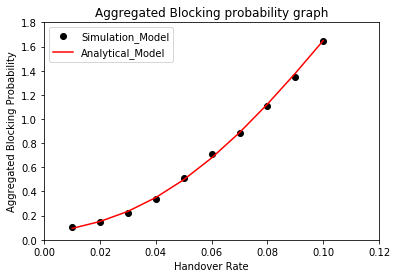

In [6]:
y3 = []

y4 = []

x = np.arange(0.01, 0.11, 0.01) # a list from 0.01 to 0.10 

for f in range(len(x)):
    p = main(0.1,x[f])
    
    y3.append(p[0])
    
    y4.append(p[1])


fig = plt.figure()

plt.xlabel("Handover Rate")

plt.ylabel("Aggregated Blocking Probability")

plt.plot(x,y3,'ok',label='Simulation_Model')

plt.plot(x,y4,'-r',label='Analytical_Model')

plt.title('Aggregated Blocking probability graph')

plt.legend(loc='upper left')

plt.xlim(0.00, 0.12);
plt.ylim(0.00, 1.8);


### The maximum value for the handover rate so that the Aggregated Blocking Probability (ABP) < 0.02 cannot be found on the graph because there is not enough servers or the threhold is too low.  

#### 2.3  Find the maximum value for the new call rates so that the ABP < 0.02.

The handover rate = 0.03 and the arrival rate is from 0.01 to 0.10.

In [ ]:
y1 = []

y2 = []

x = np.arange(0.01, 0.11, 0.01) # a list from 0.01 to 0.10 

for f in range(len(x)):
    p = main(x[f],0.03)
    
    y1.append(p[0])
    
    y2.append(p[1])


fig = plt.figure()

plt.xlabel("Arrival Rate")

plt.ylabel("Aggregated Blocking Probability")

plt.plot(x,y1,'og',label='Simulation_Model')

plt.plot(x,y2,'-b',label='Analytical_Model')

plt.title('Aggregated Blocking probability graph')

plt.legend(loc='upper left')
y = np.asarray(y2)
plt.xlim(x.min() * 1.1, x.max() * 1.1);
plt.ylim(y.min() * 1.1, y.max() * 1.1);
plt.xticks(np.arange(0.00, 0.11, 0.01));
plt.yticks(np.arange(0.00, y.max(), 0.02));

### The maximum value for the new call rates so that the ABP < 0.02 is 0.046